In [46]:
import pandas as pd
import numpy as np
import sklearn
import tkinter
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

C:/Users/Mia/Desktop/academic/ML/Proj/new/project_data_user_count_30.csv


In [4]:
data = pd.read_csv(filename,header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(5957, 15)
['app_id', 'user_rating_count', 'price', 'age_rating', 'language_en', 'language_sum', 'size', 'release_date', 'last_update', 'supported_devices', 'genres', 'average_user_rating', 'rating_current_version', 'user_rating_count_current_version', 'in_app_purchase']


In [5]:
data.head()

,app_id,user_rating_count,price,age_rating,language_en,language_sum,size,release_date,last_update,supported_devices,genres,average_user_rating,rating_current_version,user_rating_count_current_version,in_app_purchase
0,283619399,8395,1.99,4,1,1,18.715648,4153,494,65,"[6014, 6016, 7012, 7004]",4,5.0,45.0,0
1,284736660,8222,3.99,4,1,10,52.448256,4153,51,64,"[6014, 6016, 7003, 7009]",4,3.0,9.0,0
2,284791396,152303,4.99,4,1,11,241.530880,4153,285,55,"[6014, 7006, 7005]",5,5.0,21653.0,0
3,284815117,138090,7.99,4,1,6,188.383232,4153,124,65,"[6014, 7004, 7019]",4,5.0,4738.0,0
4,284862767,16687,4.99,4,1,2,219.355136,4153,230,55,"[6014, 7006, 7005, 6016]",5,5.0,1606.0,0


In [6]:
#data columns
data1=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data1_=data1.drop("genres", axis=1)

In [7]:
data2=data1_
#data21.iloc[:,5]=data1.iloc[:,5]/(1024**2)
#data21
data2

,user_rating_count,price,age_rating,language_en,language_sum,size,release_date,last_update,supported_devices,average_user_rating,in_app_purchase
0,8395,1.99,4,1,1,18.715648,4153,494,65,4,0
1,8222,3.99,4,1,10,52.448256,4153,51,64,4,0
2,152303,4.99,4,1,11,241.530880,4153,285,55,5,0
3,138090,7.99,4,1,6,188.383232,4153,124,65,4,0
4,16687,4.99,4,1,2,219.355136,4153,230,55,5,0
...,...,...,...,...,...,...,...,...,...,...,...
6199,82,0.00,4,1,1,117.641216,61,61,63,5,0
6200,107,0.00,9,1,1,267.168768,63,63,63,5,0
6201,701,0.00,9,1,1,138.152960,59,12,63,5,0
6202,71,0.00,4,1,1,128.687104,58,58,63,5,0


In [48]:
#rescale the data
from sklearn.preprocessing import StandardScaler
data2_X=data2.drop('average_user_rating',axis=1)
data2_y=data2.loc[:,data2.columns=='average_user_rating']

data2_X[['user_rating_count','price','age_rating','language_en','language_sum','size','release_date','last_update','supported_devices','in_app_purchase']]=StandardScaler().fit_transform(data2_X[['user_rating_count','price','age_rating','language_en','language_sum','size','release_date','last_update','supported_devices','in_app_purchase']])
data2_X



,user_rating_count,price,age_rating,language_en,language_sum,size,release_date,last_update,supported_devices,in_app_purchase
0,-0.087182,0.483816,-0.851485,0.087245,-0.561283,-0.564433,2.722472,-0.375926,0.403806,-1.520896
1,-0.088841,1.408494,-0.851485,0.087245,0.761213,-0.477206,2.722472,-0.969234,0.251763,-1.520896
2,1.292378,1.870834,-0.851485,0.087245,0.908157,0.011727,2.722472,-0.655839,-1.116624,-1.520896
3,1.156127,3.257851,-0.851485,0.087245,0.173437,-0.125703,2.722472,-0.871465,0.403806,-1.520896
4,-0.007692,1.870834,-0.851485,0.087245,-0.414339,-0.045615,2.722472,-0.729500,-1.116624,-1.520896
...,...,...,...,...,...,...,...,...,...,...
6199,-0.166874,-0.436239,-0.851485,0.087245,-0.561283,-0.308629,-1.862897,-0.955841,0.099720,-1.520896
6200,-0.166634,-0.436239,0.437470,0.087245,-0.561283,0.078022,-1.860656,-0.953163,0.099720,-1.520896
6201,-0.160940,-0.436239,0.437470,0.087245,-0.561283,-0.255589,-1.865139,-1.021467,0.099720,-1.520896
6202,-0.166980,-0.436239,-0.851485,0.087245,-0.561283,-0.280066,-1.866259,-0.959859,0.099720,-1.520896


In [49]:
#Our classes are imbalanced, we need to balance them 
#oversampling using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data2_X, data2_y, test_size=0.3, random_state=0)
columns=X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train.to_numpy().ravel())#flatten y 
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['average_user_rating'])

#check the numbers of dataset
print("length of oversampled data is ",len(os_data_X))
print("Number of unsuccessful apps in oversampled data",len(os_data_y[os_data_y['average_user_rating']<0.7]))
print("Number of successful apps",len(os_data_y[os_data_y['average_user_rating']>=0.7]))
print("Proportion of unsuccessful apps data in oversampled data is ",len(os_data_y[os_data_y['average_user_rating']<0.7])/len(os_data_X))
print("Proportion of successful apps data in oversampled data is ",len(os_data_y[os_data_y['average_user_rating']>=0.7])/len(os_data_X))

length of oversampled data is  10032
Number of unsuccessful apps in oversampled data 0
Number of successful apps 10032
Proportion of unsuccessful apps data in oversampled data is  0.0
Proportion of successful apps data in oversampled data is  1.0


In [70]:
#scale y to 0-1
min_max_scaler = preprocessing.MinMaxScaler()
data_y_minmax_s = min_max_scaler.fit_transform(y_train)
data_y_minmax_t = min_max_scaler.fit_transform(y_test)
y_train_s=pd.DataFrame(data_y_minmax_s)
y_test_s=pd.DataFrame(data_y_minmax_t)
y_train_s.rename(columns={0:'average_user_rating'}, inplace=True)
y_test_s.rename(columns={0:'average_user_rating'}, inplace=True)
y_train_s

,average_user_rating
0,1.000000
1,1.000000
2,1.000000
3,0.666667
4,1.000000
...,...
4164,0.666667
4165,0.666667
4166,1.000000
4167,1.000000


In [51]:
#Recursive features elimination
data2_vars=data2.columns.values.tolist()
y=['average_user_rating']
X=[i for i in data2_vars if i not in y]

In [106]:
#training a neural network

lr=0.01
n_range=4 #neurons power of 2
iterations=1
epochs=1000 #epochs

class NeuralNetwork:
    def __init__(self, n):        
        np.random.seed(11)
        self.n=n
        self.wij=np.random.rand(len(X_train.columns),self.n) #input to hidden layer
        self.wjk=np.random.rand(self.n,1) #hidden layer to output
    
    #define sigmoid function
    def sigmoid(self, x, w):
        z = np.dot(x, w)
        return 1/(1+np.exp(-z))
    
    #sigmoid derivative
    def deriv_sigmoid(self, x, w):
        fx=self.sigmoid(x,w)
        return fx*(1-fx)
    
    def loss(self, x, y):
        y_h = self.sigmoid(self.sigmoid(x, self.wij), self.wjk)
        diff = y - y_h
        return np.dot(diff.T, diff)
    
    def gradient_descent(self, x, y, iterations):

        for i in range(iterations):
            Xi=x
            Xj=self.sigmoid(Xi, self.wij)
            fi=self.sigmoid(Xj, self.wjk)
            #gradients for hidden to output weights
            g_wjk=np.dot(Xj.T, (y-fi)*self.deriv_sigmoid(Xj, self.wjk))
            #gradient for input to hiddent weights
            g_wij=np.dot(Xi.T, np.dot((y-fi)*
                                      self.deriv_sigmoid(Xj, self.wjk),
                                      self.wjk.T)*
                         self.deriv_sigmoid(Xi, self.wij))
            #update weights
            self.wij+=lr*g_wij
            self.wjk+=lr*g_wjk
            
            #print(self.loss(x, y))
            
        #print('The final prediction from neural network are: ')
        #print(self.fi)
        #print('The optimal input to hidden weights: ')
        #print(self.wij)
        #print('The optimal hidden to output weights: ')
        #print(self.wjk)
    
if __name__ == '__main__':
    
    #accu_n_df=pd.DataFrame({0:[]}) #accuracy datatable for each #of neuron
    #accu_t_df=pd.DataFrame({0:[]})#accuracy datatable ....for test set
    
    mse_train_n=pd.DataFrame(columns=['neurons','mse'])
    mse_test_n=pd.DataFrame(columns=['neurons','mse'])
    mse_train_e=pd.DataFrame(columns=['epochs','mse'])
    mse_test_e=pd.DataFrame(columns=['epochs','mse'])
    
    #fi_epoch=pd.DataFrame({0:[]})#datatable of epoch vs. prediction of training set
    #y_pred_epoch=pd.DataFrame({0:[]})#datatable of epoch vs. prediction of test set
    
 
    #for j in range(n_range):
    #y_train = y_train > 4
    #y_test = y_test > 4
    
    # euralNetwork.n=2**n_range
    nne=NeuralNetwork(2**n_range)
    for i in range(epochs):  
        
        nne.gradient_descent(X_train, y_train_s, iterations)

        #training set
        
        Xi_ne=X_train
        Xj_ne=nne.sigmoid(Xi_ne, nne.wij)
        y_predne=nne.sigmoid(Xj_ne, nne.wjk)
        
        # y_predne=pd.DataFrame(y_predne)
        mse_ne=mean_squared_error(y_train_s,y_predne)
        

        #test set
        Xi_te=X_test
        Xj_te=nne.sigmoid(Xi_te, nne.wij)
        y_prede=nne.sigmoid(Xj_te, nne.wjk)
        
        y_prede=pd.DataFrame(y_prede)
        mse_te=mean_squared_error(y_test_s,y_prede)

        #accuracy of training set for each #epochs
        if i==0:
            mse_train_e.loc[i]=[i+1,mse_ne]
            mse_train_e.append({'epochs':i,
                    'mse':mse_ne}, ignore_index=True)
        elif i>0:
            mse_train_e.loc[i]=[i+1,mse_ne]
            mse_train_e=mse_train_e.sort_index()   


        #accuracy of test set for each #epochs      

        if i==0:
            mse_test_e.loc[i]=[i+1,mse_te]
            mse_test_e.append({'epochs':i,
                    'mse':mse_te}, ignore_index=True)
        elif i>0:      
            mse_test_e.loc[i]=[i+1,mse_te]
            mse_test_e=mse_test_e.sort_index()
                
       

    print('Training set accuracy vs. epochs')               
    print(mse_train_e)
    print('Test set accuracy vs. epochs')
    print(mse_test_e)
    
        
    
    for i in range(n_range):  
        nnn=NeuralNetwork(2**i)
        nnn.gradient_descent(X_train, y_train_s, 1000)

        #training set
        
        Xi_nn=X_train
        Xj_nn=nnn.sigmoid(Xi_nn, nnn.wij)
        y_prednn=nnn.sigmoid(Xj_nn, nnn.wjk)
        
        # y_predne=pd.DataFrame(y_predne)
        mse_nn=mean_squared_error(y_train_s,y_prednn)
        

        #test set
        Xi_tn=X_test
        Xj_tn=nnn.sigmoid(Xi_tn, nnn.wij)
        y_prednt=nnn.sigmoid(Xj_tn, nnn.wjk)
        
        y_prednt=pd.DataFrame(y_prednt)
        mse_tn=mean_squared_error(y_test_s,y_prednt)

        #accuracy of training set for each #neurons
        if i==0:
            mse_train_n.loc[i]=[2**i,mse_nn]
            mse_train_n.append({'epochs':i,
                    'mse':mse_tn}, ignore_index=True)
        elif i>0:
            mse_train_n.loc[i]=[2**i,mse_nn]
            mse_train_n=mse_train_n.sort_index()   


        #accuracy of test set for each #neurons      

        if i==0:
            mse_test_n.loc[i]=[2**i,mse_tn]
            mse_test_n.append({'epochs':i,
                    'mse':mse_tn}, ignore_index=True)
        elif i>0:      
            mse_test_n.loc[i]=[2**i,mse_tn]
            mse_test_n=mse_test_n.sort_index()
    
    print('Training set accuracy vs. neurons')               
    print(mse_train_n)
    print('Test set accuracy vs. nuerons')
    print(mse_test_n)
    
    

Training set accuracy vs. epochs
     epochs       mse
0       1.0  0.061999
1       2.0  0.061648
2       3.0  0.061256
3       4.0  0.060812
4       5.0  0.060305
..      ...       ...
995   996.0  0.035816
996   997.0  0.036283
997   998.0  0.035810
998   999.0  0.036277
999  1000.0  0.035805

[1000 rows x 2 columns]
Test set accuracy vs. epochs
     epochs       mse
0       1.0  0.062623
1       2.0  0.062274
2       3.0  0.061885
3       4.0  0.061448
4       5.0  0.060953
..      ...       ...
995   996.0  0.038468
996   997.0  0.039124
997   998.0  0.038461
998   999.0  0.039118
999  1000.0  0.038455

[1000 rows x 2 columns]
Training set accuracy vs. neurons
   neurons       mse
0      1.0  0.038247
1      2.0  0.036806
2      4.0  0.036578
3      8.0  0.036055
Test set accuracy vs. nuerons
   neurons       mse
0      1.0  0.039301
1      2.0  0.039103
2      4.0  0.038736
3      8.0  0.038772


Text(0, 0.5, 'MSE')

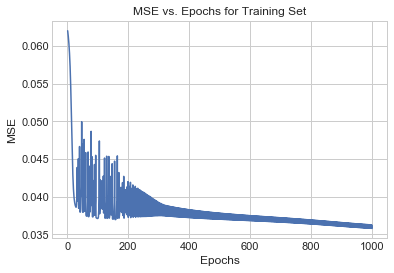

In [93]:
#plot epochs vs. mse (training set)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(mse_train_e['epochs'], mse_train_e['mse'])
plt.title("MSE vs. Epochs for Training Set")
plt.xlabel('Epochs')
plt.ylabel('MSE')

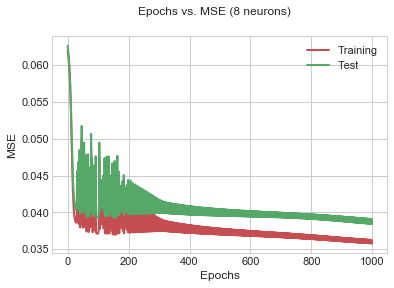

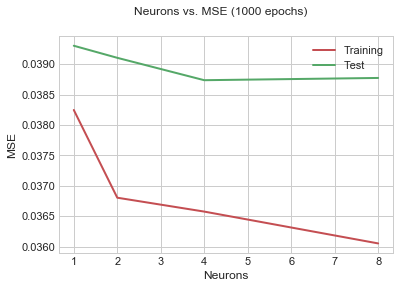

In [108]:
# plot metrics   
fig = plt.figure()
line1,=plt.plot(mse_train_e['mse'], 'r',lw=2)
line2,=plt.plot(mse_test_e['mse'], 'g', lw=2)
fig.suptitle('Epochs vs. MSE (8 neurons)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend((line1, line2), ('Training', 'Test'))
plt.show()

fig_n =plt.figure()
line3, =plt.plot(mse_train_n['neurons'], mse_train_n['mse'], 'r', lw=2)
line4, =plt.plot(mse_test_n['neurons'], mse_test_n['mse'], 'g', lw=2)
fig_n.suptitle('Neurons vs. MSE (1000 epochs)')
plt.xlabel('Neurons')
plt.ylabel('MSE')
plt.legend((line3, line4), ('Training', 'Test'))
plt.show()
